In [1]:
import numpy as np
from scipy.fft import fft2,ifft2,fftfreq,fftshift,ifftshift
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
def Optica(U0,X,Y,z,lamb):
    A = (fft2((U0)))
    Lx = np.max(abs(X))
    Ly= np.max(abs(Y))

    deltax = 2*Lx/len(U0)
    deltay = 2*Ly/len(U0)    

    fx = ( fftfreq(len(U0),deltax) )  
    fy = ( fftfreq(len(U0),deltay) )   
    
    
    Fx,Fy = np.meshgrid(fx,fy)
    K = 2*np.pi/lamb

    # Handle cases where u is negative
    u = K**2-(2*np.pi*Fx)**2-(2*np.pi*Fy)**2
    sqrt_u = 1j*z*np.sqrt(abs(u))
    sqrt_u[np.where(u<0)] = 1j*sqrt_u[np.where(u<0)]

    return  ( ifft2( ( A*np.exp(sqrt_u) ) ) )

In [3]:
def FiguraOptica2(U0,X,Y,lamb,z):
  ZX,ZY,ZD=[],[],[]
  for i in range(len(z)):
    U = Optica(U0,X,Y,z[i],lamb)
    ZX.append(abs(U[len(U0)//2])**2)
    ZY.append(abs(np.transpose(U)[len(U0)//2])**2)
    ZD.append(abs(U[X==Y])**2)
    
  return ZX,ZY,ZD

def FiguraOpticaH(U0,X,Y,lamb,L,z):
  A= U0[0]
  ZX,ZY,ZD=[],[],[]

  for i in range(len(L)):
    A =  Optica(A*U0[i],X,Y,L[i],lamb)
    uu = A.copy()
    uu[U0[i]== 0]= 1
    uu[U0[i]!= 0] = abs(uu[U0[i]!=0])**2
    ZX.append(abs(uu[len(uu)//2])**2)
    ZX.append(abs(uu[Y==0])**2)
    ZD.append(abs(uu[Y==X])**2)
    for j in range( int(L[i]//abs(z[0]-z[1])) ):
      a = Optica(A,X,Y,abs(z[0]-z[1])/(L[i]),lamb )
      ZX.append( abs(a[len(a)//2])**2 )
      ZY.append( abs(np.transpose(a)[len(a)//2])**2 )
      ZD.append( abs(a[X==Y])**2 )

  
  for i in range(len(z)):
    if i==0:
        U = Optica(A*U0[-1],X,Y,z[i],lamb)
        uu = U.copy()
        uu[U0[-1]== 0]= 1
        uu[U0[-1]!= 0] = abs(uu[U0[-1]!=0])**2
        ZX.append(abs(uu[len(uu)//2])**2)
        ZX.append(abs(uu[Y==0])**2)
        ZD.append(abs(uu[Y==X])**2)
    else:
      U = Optica(A*U0[-1],X,Y,z[i],lamb)
      ZX.append(abs(U[len(U[0])//2])**2)
      ZY.append(abs(np.transpose(U)[len(U[0])//2])**2)
      ZD.append( abs(U[X==Y])**2 )
      
    
  return ZX,ZY,ZD

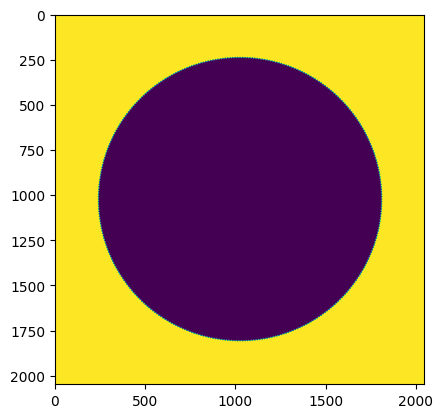

In [4]:
N = 2048
R = 8
x = np.linspace(-1.3*R,1.3*R,N,endpoint=False)
X,Y = np.meshgrid(x,x)

A = []
AA = []
L = []
GG = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
A0 = (X**2+Y**2>R**2).astype('float32')
for G in GG:
    a=[]
    aa=1
    for i in range(45,G+45,1):
        phi = i*np.pi/180
        a.append(  ( abs(np.cos(phi)*X + np.sin(phi)*Y) + abs(np.cos(phi)*Y - np.sin(phi)*X) >R  ).astype('float32') )
        aa = aa*a[-1]
        if i!=0:
            L.append(1)
    A.append(a)
    AA.append(aa)
plt.imshow(AA[-1])

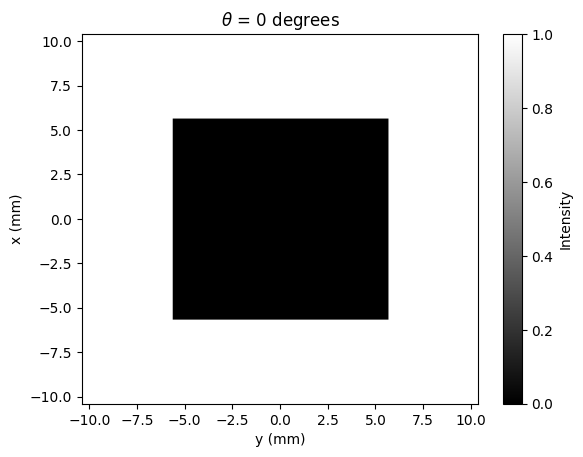

In [12]:
from matplotlib.animation import FuncAnimation
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Program Files\\ffmpeg\\bin\\ffmpeg.exe'

fig, ax = plt.subplots()

# Initialize the plot with the first frame
img = ax.imshow(AA[0] , cmap='gray', aspect='auto', extent=[-1.3*R,1.3*R,-1.3*R,1.3*R])

ax.set_xlabel('y (mm)')
ax.set_ylabel('x (mm)')
# Create a colorbar
cbar = fig.colorbar(img, ax=ax)
cbar.set_label('Intensity')
title = ax.set_title(f'$\\theta$ = {0} degrees')  # Setting the initial title

# Initialization function: plot the background of each frame
def init():
    img.set_data( AA[0]  )
    title.set_text(f'$\\theta$ = {0} degrees')  # Initialize the title
    return [img, title]

def update(frame):
    img.set_data(AA[frame] )
    title.set_text(f'$\\theta$ = {GG[frame]} degrees')  # Update the title
    return [img, title]

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(AA)), init_func=init, blit=True,interval = 300)
plt.show()
# Save the animation as a GIF or MP4
ani.save('MAkeCirck.mp4', writer='ffmpeg',dpi=500)  # or 'animation.mp4', writer='ffmpeg'



# Lateral Gif

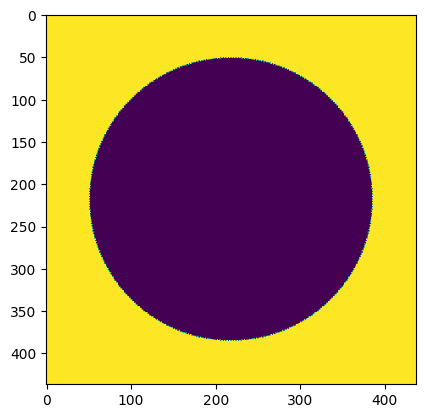

In [26]:
N = 3020
R = 8
x = np.linspace(-9*R,9*R,N,endpoint=False)
X,Y = np.meshgrid(x,x)

A = []
AA = []
L = []
GG = [1,10,30,50,70,90]
A0 = (X**2+Y**2>R**2).astype('float32')
for G in GG:
    a=[]
    aa=1
    for i in range(45,G+45,1):
        phi = i*np.pi/180
        a.append(  ( abs(np.cos(phi)*X + np.sin(phi)*Y) + abs(np.cos(phi)*Y - np.sin(phi)*X) >R  ).astype('float32') )
        aa = aa*a[-1]
        if i!=0:
            L.append(1)
    A.append(a)
    AA.append(np.transpose(aa[abs(x)<1.3*R])[abs(x)<1.3*R])
plt.imshow(AA[-1])

In [27]:
z = np.linspace(0,2000*R,1800)
lamb = 0.632*10**(-3)


ZZX,ZZY,ZZD = [],[],[]


for i in range(len(GG)):
    L = np.ones(len(A[i])-1)*16
    zz = z - np.sum(L)
    ZX,ZY,ZD = FiguraOpticaH(A[i],X,Y,lamb,L,zz)
    ZZX.append(ZX)
    ZZY.append(ZY)
    ZZD.append(ZD)
    print('--')

--
--
--
--
--
--


In [28]:
zzx = [np.transpose(ZZX[0])[abs(x)<1.3*R],np.transpose(ZZX[1])[abs(x)<1.3*R],np.transpose(ZZX[2])[abs(x)<1.3*R] ,
       np.transpose(ZZX[3])[abs(x)<1.3*R],np.transpose(ZZX[4])[abs(x)<1.3*R],np.transpose(ZZX[5])[abs(x)<1.3*R] ]

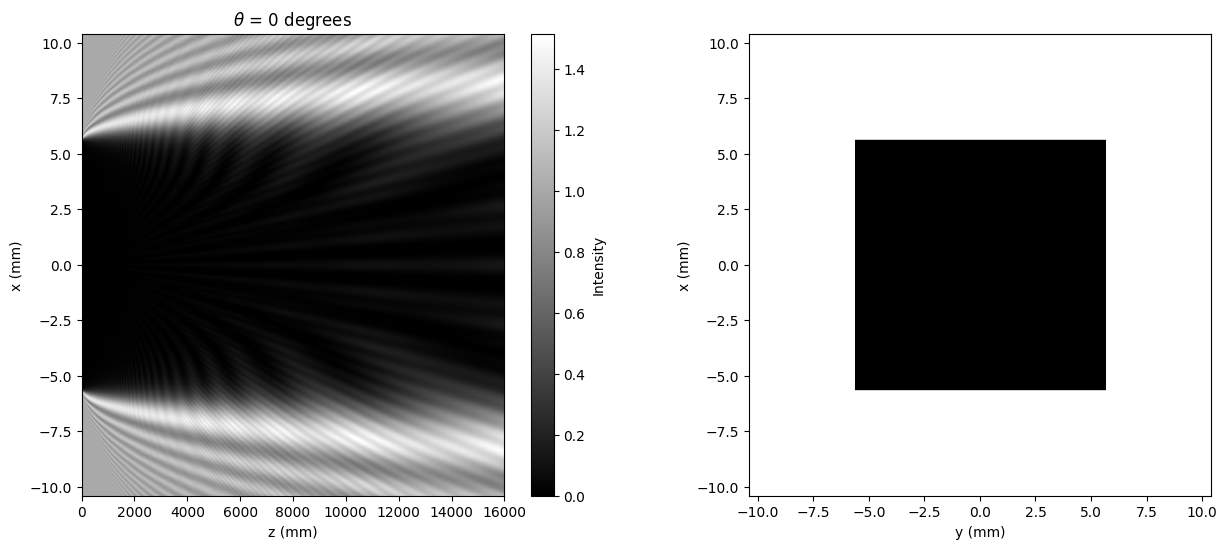

In [30]:
from matplotlib.animation import FuncAnimation
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Program Files\\ffmpeg\\bin\\ffmpeg.exe'

fig, (ax,ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Initialize the plot with the first frame
img = ax.imshow(zzx[0] , cmap='gray', aspect='auto', extent=[0,z[-1],-1.3*R,1.3*R])
img2 = ax2.imshow( AA[0], cmap='gray', extent=[-1.3*R, 1.3*R, -1.3*R, 1.3*R])

ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
# Create a colorbar
cbar = fig.colorbar(img, ax=ax)
cbar.set_label('Intensity')
title = ax.set_title(f'$\\theta$ = {0} degrees')  # Setting the initial title
#
ax2.set_xlabel('y (mm)')
ax2.set_ylabel('x (mm)')


# Initialization function: plot the background of each frame
def init():
    img.set_data( zzx[0])
    img2.set_data( AA[0] )
    title.set_text(f'$\\theta$ = {0} degrees')  # Initialize the title
    return [img, title,img2]

def update(frame):
    img.set_data(zzx[frame] )
    img2.set_data( AA[frame] )
    title.set_text(f'$\\theta$ = {GG[frame]} degrees')  # Update the title
    return [img, title,img2]

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(GG)), init_func=init, blit=True,interval = 700)
plt.show()
# Save the animation as a GIF or MP4
ani.save('MAkeCirckLateralX.gif', writer='ffmpeg',dpi=500)  # or 'animation.mp4', writer='ffmpeg'



In [55]:
zzy = [np.transpose(ZZY[0])[abs(x)<1.3*R],np.transpose(ZZY[1])[abs(x)<1.3*R],np.transpose(ZZY[2])[abs(x)<1.3*R] ,
       np.transpose(ZZY[3])[abs(x)<1.3*R],np.transpose(ZZY[4])[abs(x)<1.3*R],np.transpose(ZZY[5])[abs(x)<1.3*R] ]

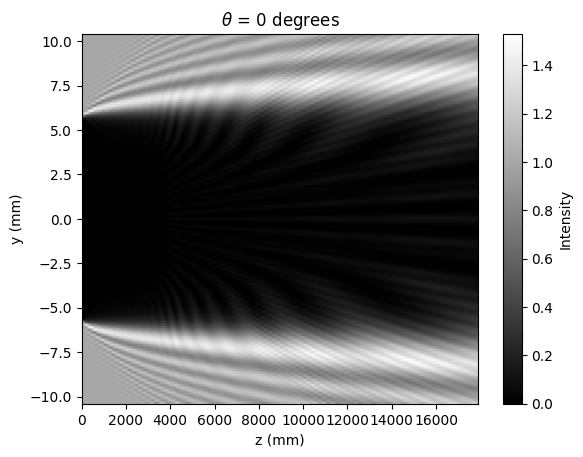

In [56]:
from matplotlib.animation import FuncAnimation
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Program Files\\ffmpeg\\bin\\ffmpeg.exe'

fig, ax = plt.subplots()

# Initialize the plot with the first frame
img = ax.imshow(zzy[0] , cmap='gray', aspect='auto', extent=[0,1600*R+5*len(A[0][0]-1),-1.3*R,1.3*R])

ax.set_xlabel('z (mm)')
ax.set_ylabel('y (mm)')
# Create a colorbar
cbar = fig.colorbar(img, ax=ax)
cbar.set_label('Intensity')
title = ax.set_title(f'$\\theta$ = {0} degrees')  # Setting the initial title

# Initialization function: plot the background of each frame
def init():
    img.set_data( zzy[0])
    title.set_text(f'$\\theta$ = {0} degrees')  # Initialize the title
    return [img, title]

def update(frame):
    img.set_data(zzy[frame] )
    title.set_text(f'$\\theta$ = {GG[frame]} degrees')  # Update the title
    return [img, title]

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(GG)), init_func=init, blit=True,interval = 500)
plt.show()
# Save the animation as a GIF or MP4
ani.save('MAkeCirckLateralY.gif', writer='ffmpeg',dpi=500)  # or 'animation.mp4', writer='ffmpeg'

